# Problem Statement: https://www.kaggle.com/competitions/jargon-detection/overview
###    Technical terminology expressions are unique to a particular field and have implied meanings that do not conform to common expectations. Non-experienced individuals would either be completely unaware of the meaning of such concepts or tend to interpret common words in a different sense than intended, failing to understand the communication attempt in either case. This, in turn, creates a significant entry barrier to reading scholarly writing. A primordial first step to creating a scientific-document reading system is to be able to recognize these technical terms that could delay, or even impede, reader understanding. As very few research efforts have been devoted to this matter, we propose a technical terminology detection shared task at SDU@AAAI-23 in an attempt to push forward the research on technical terminology understanding.

### Task 1 - Jargon/Terminology Detection
#### This task aims to identify domain-specific technical terminology, a.k.a. jargon, used in scientific research papers. This includes both words that are specific to a field or commonly used terms that acquire particular meanings within such a field. For instance:

#### Input: Afterwards, model training is performed using cross-entropy loss.

#### Output: Afterwards, model training is performed using cross-entropy loss.

#### In this example, the terms "model training" and "cross-entropy loss" are technical computer science concepts that should be identified. To simplify the task, only the main noun in a nominal phrase should be tagged. The task is modeled as a sentence-level sequence labeling problem. Participants are provided with manually-labeled training and development datasets from three distinct scientific domains: Computer Science, Economics, and Physics. Each scientific domain has its own train/dev/test splits. Considering both the training and development sets, the provided dataset includes 7000+ Computer Science sentences, 6000+ Economics sentences, and 8000+ Physics sentences. The submitted systems will be evaluated based on their precision, recall, and F1 scores on the hidden test set computed for correct prediction boundaries in the sentences.

## imports the necessary libraries, downloads the stopwords from NLTK, and sets up Spacy

In [192]:
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/wineta2/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Load a JSON dataset into a pandas dataframe and getting English language models and stopwords

In [193]:
# Load the JSON dataset into a pandas dataframe
path = 'updated_full_train.json'
df = pd.read_json(path, lines=True)
# Load Spacy's English language model
nlp = spacy.load('en_core_web_sm')
# Get NLTK's English stopwords
nltk_stopwords = set(stopwords.words('english'))

## Visualize data

In [95]:
print(df.head())
print(df.shape)

                                              tokens  \
0  [A, SHAP, summary, plot, shows, the, SHAP, val...   
1  [Figure, ~, shows, two, examples, of, SHAP, su...   
2  [In, each, SHAP, summary, plot, the, horizonta...   
3  [A, positive, SHAP, value, in, our, experiment...   
4  [Each, point, in, this, plot, is, created, by,...   

                                           label_ids  
0      [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]  
1                     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]  
2  [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...  
3  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
(21018, 2)


In [194]:
df = df.explode(['tokens','label_ids'],ignore_index=True)

In [97]:
print(df.head())
print(df.shape)
print(df.describe())

    tokens label_ids
0        A         0
1     SHAP         0
2  summary         0
3     plot         1
4    shows         0
(574910, 2)
        tokens  label_ids
count   574910     574910
unique   29483          2
top        the          0
freq     37170     518050


## Define a function to remove stopwords from a token

In [195]:
# Define a function to remove stopwords from a token
def remove_stopwords(token):
    if token.lower() not in nltk_stopwords:
        return token
    else:
        return ''


## Remove stopwords from the 'tokens' column of the dataframe, drops any empty rows

In [196]:
# Apply the function to the 'token' column of the dataframe
df['tokens'] = df['tokens'].apply(remove_stopwords)

# Drop any rows where 'token' is empty
df.drop(df[df['tokens'] == ''].index, inplace=True)

# Print the resulting dataframe
print(df.head())

    tokens label_ids
1     SHAP         0
2  summary         0
3     plot         1
4    shows         0
6     SHAP         0


## Dataframe description

In [100]:
print(df.head())
print(df.shape)
print(df.describe())

    tokens label_ids
1     SHAP         0
2  summary         0
3     plot         1
4    shows         0
6     SHAP         0
(374005, 2)
        tokens  label_ids
count   374005     374005
unique   29245          2
top          ,          0
freq     24144     317566


## Data cleaning

In [197]:
import string

In [198]:
# Define a function to remove punctuation from a string
def remove_punctuations(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [199]:
# Apply the function to the 'text' column and create a new column 'clean_text'
df['tokens'] = df['tokens'].apply(lambda x: remove_punctuations(x))

# Drop rows where the 'clean_text' column is empty
df = df.drop(df[df['tokens'] == ''].index)


## Dataframe description after cleaning punctuations

In [104]:
print(df.head())
print(df.shape)
print(df.describe())

    tokens label_ids
1     SHAP         0
2  summary         0
3     plot         1
4    shows         0
6     SHAP         0
(301784, 2)
        tokens  label_ids
count   301784     301784
unique   25360          2
top      model          0
freq      1796     246412


In [200]:
# Drop the rows with empty tokens column after removing punctuations
df = df.drop(df[df['tokens'].apply(len) == 0].index)

In [106]:
# Check shape of dataframe
print("Dataframe shape:", df.shape)

# Check size of dataframe
print("Dataframe size:", df.size)

# Check column names of dataframe
print("Column names:", df.columns)

# Check information about dataframe
print(df.info())

Dataframe shape: (301784, 2)
Dataframe size: 603568
Column names: Index(['tokens', 'label_ids'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 301784 entries, 1 to 574908
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   tokens     301784 non-null  object
 1   label_ids  301784 non-null  object
dtypes: object(2)
memory usage: 6.9+ MB
None


In [201]:
# Check for missing values in the dataframe
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
tokens       0
label_ids    0
dtype: int64


## Data visualizations about label ids imbalance

In [202]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

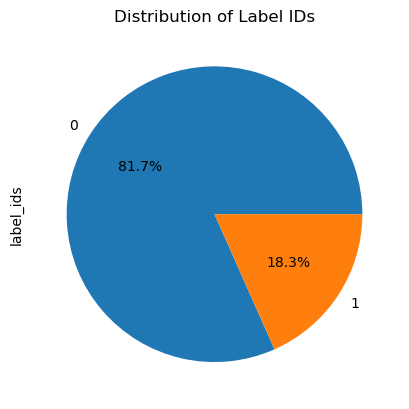

In [109]:
# Visualize the distribution of label_ids
df['label_ids'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Label IDs')
plt.show()

## Frequency of each token

In [110]:
# Explore the frequency of each token
token_counts = df['tokens'].value_counts()
print('Token Counts:')
print(token_counts)

Token Counts:
model            1796
data             1186
time             1114
two              1023
one               964
                 ... 
3243                1
singleness          1
lasers              1
CPLEX               1
logarithmized       1
Name: tokens, Length: 25360, dtype: int64


## Visualize the frequency of the tokens using a word cloud

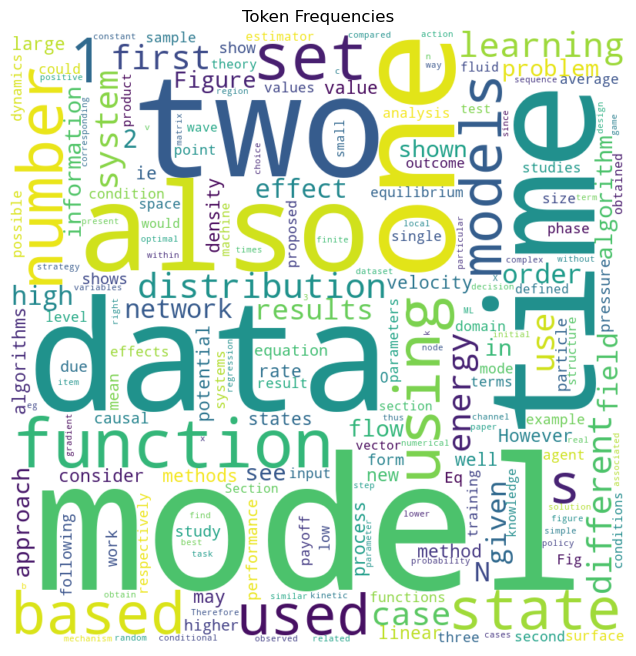

In [111]:
# Visualize the frequency of the tokens using a word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(token_counts)
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Token Frequencies')
plt.show()

## Compute summary statistics of token frequency

In [112]:
# Compute summary statistics of token frequency
mean_token_freq = token_counts.mean()
median_token_freq = token_counts.median()
std_token_freq = token_counts.std()
print(f'Mean Token Frequency: {mean_token_freq}')
print(f'Median Token Frequency: {median_token_freq}')
print(f'Standard Deviation of Token Frequency: {std_token_freq}')

Mean Token Frequency: 11.9
Median Token Frequency: 2.0
Standard Deviation of Token Frequency: 43.0613753359388


In [203]:
from scipy.stats import ttest_ind

## Computes mean and standard deviation of token frequency for two groups of tokens, performs t-test to check for significant differences in token frequency, and prints the results.

In [114]:
# Split the data into two groups based on label_ids
group_0 = df[df['label_ids'] == 0]['tokens']
group_1 = df[df['label_ids'] == 1]['tokens']

# Compute the mean and standard deviation of token frequency for each group
mean_0 = group_0.value_counts().mean()
std_0 = group_0.value_counts().std()

mean_1 = group_1.value_counts().mean()
std_1 = group_1.value_counts().std()

# Perform a t-test to check for significant differences in token frequency between the two groups
t_statistic, p_value = ttest_ind(group_0.value_counts(), group_1.value_counts())

print('Group 0 mean:', mean_0, 'std:', std_0)
print('Group 1 mean:', mean_1, 'std:', std_1)
print('T-statistic:', t_statistic, 'P-value:', p_value)


Group 0 mean: 10.561570442758562 std: 36.78216613477754
Group 1 mean: 8.836897542291734 std: 28.212802415884664
T-statistic: 3.449111475520162 P-value: 0.000563217461433168


#### The output represents the results of a two-sample t-test to compare the mean token frequency between two groups (label_ids).

#### The first two lines show the mean and standard deviation of token frequency for each group. In this case, group 0 has a higher mean frequency of 10.56 with a larger standard deviation of 36.78, while group 1 has a lower mean frequency of 8.84 with a smaller standard deviation of 28.21.

#### The third line shows the t-statistic value, which is a measure of how different the means of the two groups are, taking into account the variability of the data. In this case, the t-statistic is 3.449, which indicates a significant difference between the two groups.

#### The last line shows the p-value of the test, which is the probability of observing a t-statistic as extreme or more extreme than the one calculated under the null hypothesis (i.e., there is no significant difference between the groups). In this case, the p-value is 0.00056, which is smaller than the commonly used significance level of 0.05, indicating strong evidence against the null hypothesis and supporting the conclusion that there is a significant difference in token frequency between the two groups.

## Boxplot of token frequency for each label_id

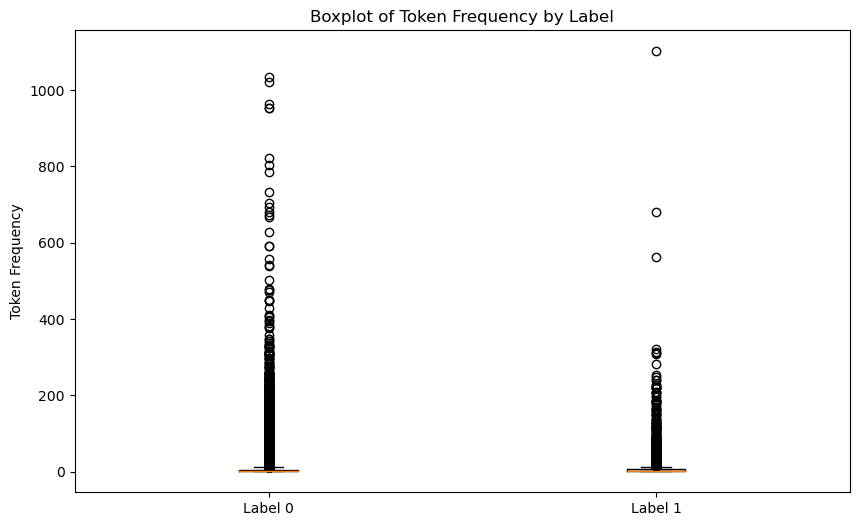

In [115]:
# Create a boxplot of token frequency for each label_id
plt.figure(figsize=(10,6))
plt.boxplot([df[df['label_ids']==0]['tokens'].value_counts(), df[df['label_ids']==1]['tokens'].value_counts()])
plt.xticks([1, 2], ['Label 0', 'Label 1'])
plt.ylabel('Token Frequency')
plt.title('Boxplot of Token Frequency by Label')
plt.show()


This code creates a boxplot of token frequency for each label_id using the boxplot function from Matplotlib. The df[df['label_ids']==0]['tokens'].value_counts() and df[df['label_ids']==1]['tokens'].value_counts() parts extract the token frequencies for each label_id. The xticks function sets the labels for the x-axis. The ylabel function sets the label for the y-axis. The title function sets the title for the plot.

This plot can be used to identify any outliers or anomalies in the data. Outliers are the points that lie outside the whiskers of the boxplot. You can investigate these points further to determine if they are errors or legitimate data points.

In [116]:
import seaborn as sns

## A scatter plot to explore correlation between token frequency and label_ids by calculating frequency of each token 

<Axes: xlabel='token_freq', ylabel='label_ids'>

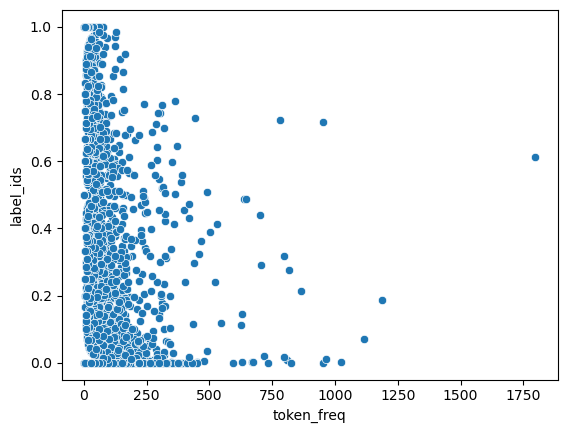

In [117]:
# calculate the frequency of each token
token_freq = df['tokens'].value_counts()

# create a new dataframe with token frequency and label_ids
df_corr = pd.DataFrame({'token_freq': token_freq, 'label_ids': df.groupby('tokens')['label_ids'].mean()})

# plot a scatter plot to explore the correlation between token frequency and label_ids
sns.scatterplot(x='token_freq', y='label_ids', data=df_corr)

## Plot a heatmap to visualize the correlation between token frequency and label_ids

<Axes: xlabel='label_ids', ylabel='label_ids'>

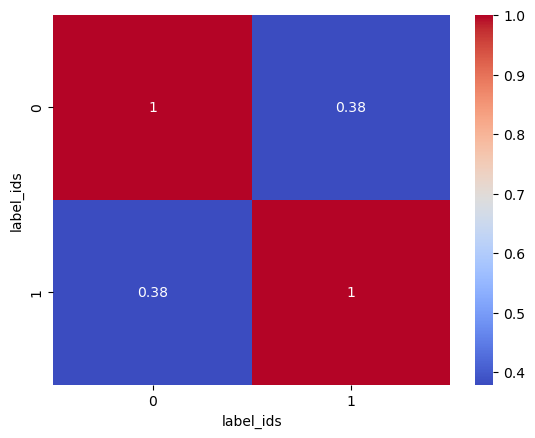

In [118]:
# create a pivot table with token frequency and label_ids
df_pivot = df.groupby(['tokens', 'label_ids']).size().reset_index().pivot(columns='label_ids', index='tokens', values=0).fillna(0)

# plot a heatmap to visualize the correlation between token frequency and label_ids
sns.heatmap(df_pivot.corr(), annot=True, cmap='coolwarm')


### In the above code, we first calculate the frequency of each token using the value_counts() function. We then create a new dataframe df_corr with token_freq and label_ids columns. We group the original dataframe df by tokens and calculate the mean of label_ids to get the label frequency for each token. We then plot a scatter plot using sns.scatterplot() to explore the correlation between token_freq and label_ids.

## imports necessary packages for performing evaluation on the CRF model

In [204]:
import sklearn_crfsuite
from sklearn_crfsuite import metrics as crfMetrics
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [205]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(df['tokens'], df['label_ids'], test_size=0.2)

## Define a feature function that extracts various features of a word and its surrounding words in a sentence

In [206]:
# Define feature functions
def words_to_features(sent, i):
    word = sent[i]
    feats = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit()
    }
    if i > 0:
        prev_word = sent[i-1]
        feats.update({
            '-1:word.lower()': prev_word.lower(),
            '-1:word.istitle()': prev_word.istitle(),
            '-1:word.isupper()': prev_word.isupper()
        })
    else:
        feats['BOS'] = True

    if i < len(sent)-1:
        next_word = sent[i+1]
        feats.update({
            '+1:word.lower()': next_word.lower(),
            '+1:word.istitle()': next_word.istitle(),
            '+1:word.isupper()': next_word.isupper()
        })
    else:
        feats['EOS'] = True

    return feats

## Returns a list of features for each word in a sentence

In [207]:
def sentence_to_features(sent):
    return [words_to_features(sent, i) for i in range(len(sent))]

## Function converts a list of labels to a list of strings

In [208]:
def sentence_to_labels(sent):
    return [str(label) for label in sent]

## Convert the data to features and labels

In [209]:
# Convert the data to features and labels
X_train = [sent.split() for sent in X_train]
y_train = [list(str(label)) for label in y_train]
X_test = [sent.split() for sent in X_test]
y_test = [list(str(label)) for label in y_test]

In [210]:
X_train = [sentence_to_features(sent) for sent in X_train]
y_train = [sentence_to_labels(sent) for sent in y_train]
X_test = [sentence_to_features(sent) for sent in X_test]
y_test = [sentence_to_labels(sent) for sent in y_test]

## Train the CRF model

In [211]:
# Train the CRF model
crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.2,
    max_iterations=100,
    all_possible_transitions=True
)



In [212]:
try:
    crf.fit(X_train, y_train)
except AttributeError:
    pass

## Evaluate the model on the test data

In [213]:
# Evaluate the model on the test data
y_pred = crf.predict(X_test)

In [241]:
y_pred[0:10]

[['0'], ['0'], ['0'], ['1'], ['0'], ['0'], ['1'], ['0'], ['0'], ['0']]

## Print classification report and other evaluation metric

In [214]:
print(crfMetrics.flat_accuracy_score(y_test, y_pred))

0.8635949434199844


In [215]:
print(crfMetrics.flat_precision_score(y_test, y_pred, pos_label='1'))

0.6739662501610202


In [216]:
print(crfMetrics.flat_recall_score(y_test, y_pred, pos_label='1'))

0.47850740808487285


In [217]:
print(crfMetrics.flat_f1_score(y_test, y_pred, pos_label='1'))

0.5596619778574102


In [218]:
labels = list(crf.classes_)
labels

['0', '1']

In [219]:
sorted_labels = sorted(
    labels,
    key=lambda name: (name[1:], name[0])
)

In [220]:
print(metrics.classification_report(y_test, y_pred,labels=sorted_labels))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     49423
           1       0.67      0.48      0.56     10934

    accuracy                           0.86     60357
   macro avg       0.78      0.71      0.74     60357
weighted avg       0.85      0.86      0.85     60357



In [221]:
 print(crfMetrics.sequence_accuracy_score(y_test, y_pred))

0.8635949434199844


## Validation dataset

In [242]:
pathValid = 'updated_full_dev.json'
df_valid = pd.read_json(pathValid, lines=True)

In [243]:
df_valid = df_valid.explode(['tokens','label_ids'],ignore_index=True)

In [244]:
df_valid

,tokens,label_ids
0,Section,0
1,~,0
2,illustrates,0
3,the,0
4,proposed,0
...,...,...
37138,and,0
37139,maximizes,0
37140,social,0
37141,welfare,1


In [245]:
# Apply the function to the 'token' column of the dataframe
df_valid['tokens'] = df_valid['tokens'].apply(remove_stopwords)

# Drop any rows where 'token' is empty
df_valid.drop(df_valid[df_valid['tokens'] == ''].index, inplace=True)

In [246]:
# Drop the rows with empty tokens column after removing punctuations
df_valid.drop(df_valid[df_valid['tokens'].apply(len) == 0].index, inplace=True)

In [247]:
# Apply the function to the 'text' column and create a new column 'clean_text'
df_valid['tokens'] = df_valid['tokens'].apply(lambda x: remove_punctuations(x))

# Drop rows where the 'clean_text' column is empty
df_valid.drop(df_valid[df_valid['tokens'] == ''].index, inplace=True)

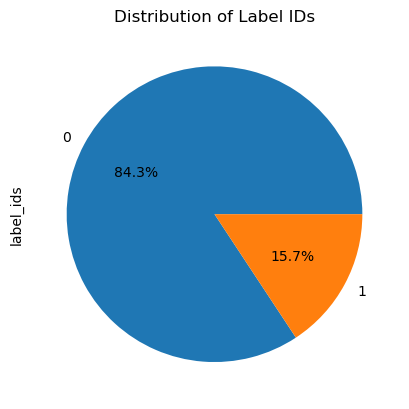

In [228]:
# Visualize the distribution of label_ids
df_valid['label_ids'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Label IDs')
plt.show()

In [248]:
X_valid = df_valid['tokens']
y_valid = df_valid['label_ids']

In [249]:
# Convert the data to features and labels
X_valid = [sent.split() for sent in X_valid]
y_valid = [list(str(label)) for label in y_valid]
X_valid = [sentence_to_features(sent) for sent in X_valid]
y_valid = [sentence_to_labels(sent) for sent in y_valid]

In [250]:
# Evaluate the model on the test data
y_pred_val = crf.predict(X_valid)

In [251]:
y_pred_val[0:10]

[['0'], ['0'], ['0'], ['0'], ['1'], ['0'], ['1'], ['0'], ['0'], ['0']]

In [252]:
y_valid[0:10]

[['0'], ['0'], ['0'], ['0'], ['0'], ['0'], ['1'], ['0'], ['0'], ['0']]

In [253]:
print(metrics.classification_report(y_valid, y_pred_val,labels=sorted_labels))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     16018
           1       0.58      0.34      0.43      3746

    accuracy                           0.83     19764
   macro avg       0.72      0.64      0.66     19764
weighted avg       0.81      0.83      0.81     19764



In [272]:
%%time
pathTestData = 'test_no_labels.csv'
df_testdata = pd.read_csv(pathTestData)


CPU times: user 44.8 ms, sys: 19 µs, total: 44.9 ms
Wall time: 43.1 ms


In [273]:
print(df_testdata.head())
print(df_testdata.shape)
print(df_testdata.describe())

          token_id    token label
0  cs/doc_1977/0/0     Next     O
1  cs/doc_1977/0/1        ,     O
2  cs/doc_1977/0/2       we     O
3  cs/doc_1977/0/3  analyze     O
4  cs/doc_1977/0/4      the     O
(42358, 3)
               token_id  token  label
count             42358  42357  42358
unique            42358   5902      1
top     cs/doc_1977/0/0    the      O
freq                  1   2578  42358


In [266]:
X_testdata = df_testdata['tokens']

# Convert the data to features and labels
X_testdata = [sent.split() for sent in X_testdata]

X_testdata = [sentence_to_features(sent) for sent in X_testdata]

# Evaluate the model on the test data
y_pred_test = crf.predict(X_testdata)

In [267]:
len(y_pred_test)

42358

In [292]:
y_pred_test[5]

['1']

In [274]:
df_testdata['label']=y_pred_test

In [281]:
df_testdata['label'] = df_testdata['label'].apply(lambda x: x[0])

In [284]:
df_testdata['label'].value_counts()

0    39826
1     2532
Name: label, dtype: int64

In [294]:
df_testdata.iloc[5]

token_id    cs/doc_1977/0/5
token                 query
label                     1
Name: 5, dtype: object

In [326]:
df_testdata['label'] = df_testdata['label'].replace({'0': 'O', '1': 'TERM'})

In [327]:
df_testdata['label'].iloc[5]

'TERM'

In [328]:
# extract the first and last column
first_col = df_testdata.iloc[:,  0]
last_col  = df_testdata.iloc[:, -1]

In [329]:
# concatenate the extracted columns into a new dataframe
new_df = pd.concat([first_col, last_col], axis=1)
new_df

,token_id,label
0,cs/doc_1977/0/0,O
1,cs/doc_1977/0/1,O
2,cs/doc_1977/0/2,O
3,cs/doc_1977/0/3,O
4,cs/doc_1977/0/4,O
...,...,...
42353,phys/doc_2100/10/20,O
42354,phys/doc_2100/10/21,O
42355,phys/doc_2100/10/22,O
42356,phys/doc_2100/10/23,O


In [330]:
# write the new dataframe into a CSV file
new_df.to_csv('output.csv', index=False)

## Upload the predictions to kaggle challenge here https://www.kaggle.com/competitions/jargon-detection/submissions